<a href="https://colab.research.google.com/github/JoseAnt96/Anexo-TFM/blob/main/DT_memory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# carga de datos
import pandas as pd
import io
from google.colab import files
# manipulación y visualización
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from sklearn import preprocessing 
from sklearn.decomposition import PCA
from scipy import cluster
import sklearn.neighbors
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import DBSCAN
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import sklearn.neighbors
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import DBSCAN
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [ ]:
def upload_files ():
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')))
    return df

In [ ]:
datos = upload_files()

Saving datos_modelo_v3.csv to datos_modelo_v3.csv
User uploaded file "datos_modelo_v3.csv" with length 1520419 bytes


In [ ]:
x = datos.drop(['GAME_DATE_EST','GAME_ID', 'HOME_TEAM_ID','VISITOR_TEAM_ID','HOME_TEAM_WINS'],axis=1)
y = datos['HOME_TEAM_WINS']
one_hot_x = pd.get_dummies(x,drop_first=True)
one_hot_x = one_hot_x.drop(['conferencia_EW','conferencia_WE','conferencia_WW'], axis = 1)

In [ ]:
one_hot_x.shape

(6589, 28)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(one_hot_x, y, test_size=0.20)
#scaler = MinMaxScaler()
#x_scaler = scaler.fit_transform(x)
#X_train_scaler, X_test_scaler, y_train_scaler, y_test_scaler = train_test_split(x_scaler, y, test_size=0.20)

La primera prueba consistirá en realiazar un árbol de decisión con la base de datos original, sin realizar ningún tipo de modificación. Unicamente se establece el criterio "entropy" al modelo.

In [ ]:
classifier_original = DecisionTreeClassifier(criterion = 'entropy',
            random_state = 123)
classifier_original.fit(X_train, y_train)
y_pred = classifier_original.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[278 277]
 [280 483]]
              precision    recall  f1-score   support

           0       0.50      0.50      0.50       555
           1       0.64      0.63      0.63       763

    accuracy                           0.58      1318
   macro avg       0.57      0.57      0.57      1318
weighted avg       0.58      0.58      0.58      1318



In [ ]:
grid_dt = {'max_depth': [None,1,2,3,4,5,6],
           'min_samples_split': [1,2,3,4,5,6],
           'min_samples_leaf': [20,25,30,35],
           'max_leaf_nodes': [5,10,15,20,25],
           'random_state': [125]
            }
      
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
grid_search_dt = GridSearchCV(
    estimator = classifier_original,
    param_grid = grid_dt,
    n_jobs = 10,
    cv = 5,
    verbose=True
)
grid_search_dt.fit(X_train, y_train)

Fitting 5 folds for each of 840 candidates, totalling 4200 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    5.5s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:   10.7s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:   18.6s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:   26.7s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:   32.6s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:   41.8s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:   55.6s
[Parallel(n_jobs=10)]: Done 3180 tasks      | elapsed:  1.2min
[Parallel(n_jobs=10)]: Done 4030 tasks      | elapsed:  1.7min
[Parallel(n_jobs=10)]: Done 4200 out of 4200 | elapsed:  1.8min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='entropy',
                                              max_depth=None, max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=123,
                                              splitter='best'),
             iid='deprecated', n_jobs=10,
             param_grid={'max_depth': [None, 1, 2, 3, 4, 5, 6],
              

In [ ]:
grid_search_dt.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=20,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=25, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=125, splitter='best')

In [ ]:
best_grid_dt = grid_search_dt.best_estimator_

best_grid_dt.fit(X = X_train, y = y_train)
dt_pred = best_grid_dt.predict(X_test)
print(confusion_matrix(y_test, dt_pred))
print(classification_report(y_test, dt_pred))

[[239 316]
 [156 607]]
              precision    recall  f1-score   support

           0       0.61      0.43      0.50       555
           1       0.66      0.80      0.72       763

    accuracy                           0.64      1318
   macro avg       0.63      0.61      0.61      1318
weighted avg       0.64      0.64      0.63      1318



El resultado del análisis de hiperparámetros determina que el valor de los 4 parámetros a los que se han introducido un número de valores diferentes su resultado es el suguiente:

- max_depth: None
- min_samples_split: 2
- min_samples_leaf: 25
- max_leaf_nodes: 20

Estos serán los valores utilizados para los parámetros en los siguietes pasos.

In [ ]:
j = 100
for i in range(4, 29):
  model = DecisionTreeClassifier(criterion = 'entropy', max_depth= None, min_samples_split = 2, min_samples_leaf=25, max_leaf_nodes=20, random_state = j)
  rfe = RFE(model, i)
  fit = rfe.fit(X_train, y_train)
  print("Num Features: %s" % (fit.n_features_))
  print("Selected Features: %s" % (fit.support_))
  print("Feature Ranking: %s" % (fit.ranking_))
  one_hot_x_SV = one_hot_x.iloc[:,fit.support_]
  X_train_SV, X_test_SV, y_train_SV, y_test_SV = train_test_split(one_hot_x_SV, y, test_size=0.20)
  
  model.fit(X_train_SV, y_train_SV)
  y_pred_sv = model.predict(X_test_SV)

  print(confusion_matrix(y_test_SV, y_pred_sv))
  print(classification_report(y_test_SV, y_pred_sv))

  dot_data2 = StringIO()
  feature_cols = one_hot_x_SV.columns
  export_graphviz(model, out_file=dot_data2,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
  graph2 = pydotplus.graph_from_dot_data(dot_data2.getvalue())  
  graph2.write_png('nba2.png')
  print(Image(graph2.create_png()))
  j = j+1

Num Features: 4
Selected Features: [False False False False  True  True False False False False False False
 False False False False False False False False False False False False
  True  True False False]
Feature Ranking: [25 24  2  9  1  1 14  4 13  8  3 17 19  6 23 22 12 11 10  5 15 16  7 18
  1  1 20 21]
[[153 394]
 [121 650]]
              precision    recall  f1-score   support

           0       0.56      0.28      0.37       547
           1       0.62      0.84      0.72       771

    accuracy                           0.61      1318
   macro avg       0.59      0.56      0.54      1318
weighted avg       0.60      0.61      0.57      1318

<IPython.core.display.Image object>
Num Features: 5
Selected Features: [False False  True False  True  True False False False False False False
 False False False False False False False False False False False False
  True  True False False]
Feature Ranking: [24 23  1  8  1  1 13  3 12  7  2 16 18  5 22 21 11 10  9  4 14 15  6 17
  1  1

In [ ]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth= None, min_samples_split = 2, min_samples_leaf=25, max_leaf_nodes=20, random_state = 101)
one_hot_x_SV = one_hot_x.iloc[:,[2,4,5,24,25]]
X_train_SV, X_test_SV, y_train_SV, y_test_SV = train_test_split(one_hot_x_SV, y, test_size=0.20)
  
model.fit(X_train_SV, y_train_SV)
y_pred_sv = model.predict(X_test_SV)
print(confusion_matrix(y_test_SV, y_pred_sv))
print(classification_report(y_test_SV, y_pred_sv))

[[163 395]
 [ 82 678]]
              precision    recall  f1-score   support

           0       0.67      0.29      0.41       558
           1       0.63      0.89      0.74       760

    accuracy                           0.64      1318
   macro avg       0.65      0.59      0.57      1318
weighted avg       0.65      0.64      0.60      1318



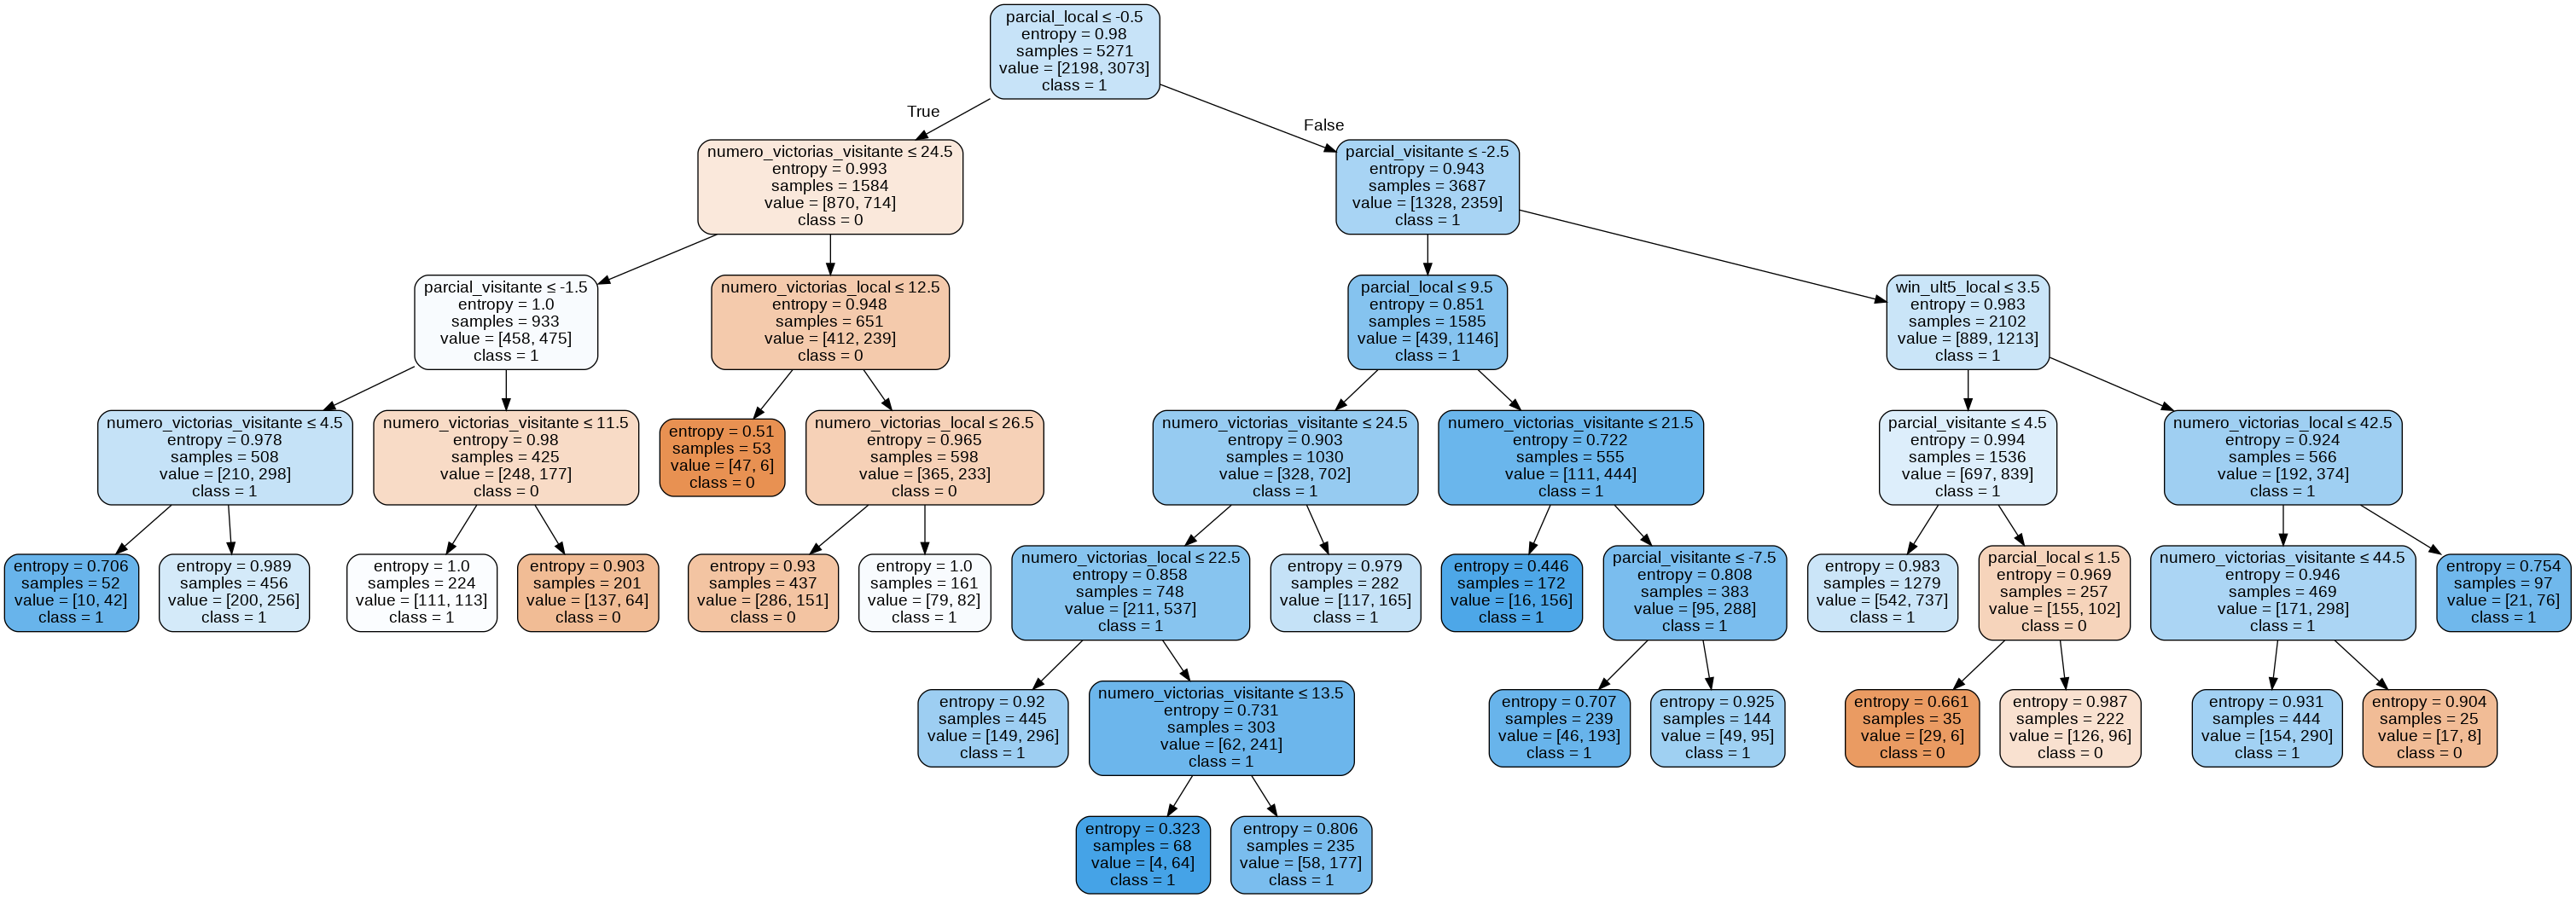

In [ ]:
dot_data2 = StringIO()
feature_cols = one_hot_x_SV.columns
export_graphviz(model, out_file=dot_data2,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph2 = pydotplus.graph_from_dot_data(dot_data2.getvalue())  
graph2.write_png('nba2.png')
Image(graph2.create_png())
